# Compile results

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scripts.io import read_image, KEY_OUTPUT_SAR, KEY_INPUT_SAR
from scripts.utils import c2ap, standardize
from skimage import exposure

In [43]:
def T(img, gamma=0.8):
    img_T = img.copy()
    img_T, _ = standardize(np.clip(img_T, 0, 255))
    img_T = exposure.rescale_intensity(img_T, in_range=(-5, 5), out_range=(0, 1))
    img_T = exposure.adjust_gamma(img_T, gamma=gamma, gain=1.0).squeeze()
    return img_T

In [26]:
baseline_directory = '../methods/'
name = 'village'
METHOD_LIST = os.listdir(baseline_directory)
METHOD_LIST = [m for m in METHOD_LIST if not m.startswith('__') and len(os.listdir(os.path.join(baseline_directory, m, 'results'))) > 0]

METHOD_LIST

['gbf',
 'aef',
 'bm3d',
 'ppb',
 'tbog',
 'fans',
 'sar2sar',
 'merlin',
 'sarbm3d',
 'gnlm']

In [37]:
results_dict = {}

for m in METHOD_LIST:
    filenames = os.listdir(os.path.join(baseline_directory, m, 'results'))
    for f in filenames:
        if f.endswith('.mat') and name in f:
            result_path = os.path.join(baseline_directory, m, 'results', f)
            filtered_data = read_image(result_path, key=KEY_OUTPUT_SAR)
            filtered_data, _ = c2ap(filtered_data)

            results_dict[m] = filtered_data

results_dict.keys()

dict_keys(['gbf', 'bm3d', 'ppb', 'tbog', 'fans', 'sar2sar', 'sarbm3d', 'gnlm'])

In [38]:
input_path = f"../../dataset/data_{name}.npz"

raw_data = read_image(input_path, KEY_INPUT_SAR)
raw_data, _ = c2ap(raw_data)

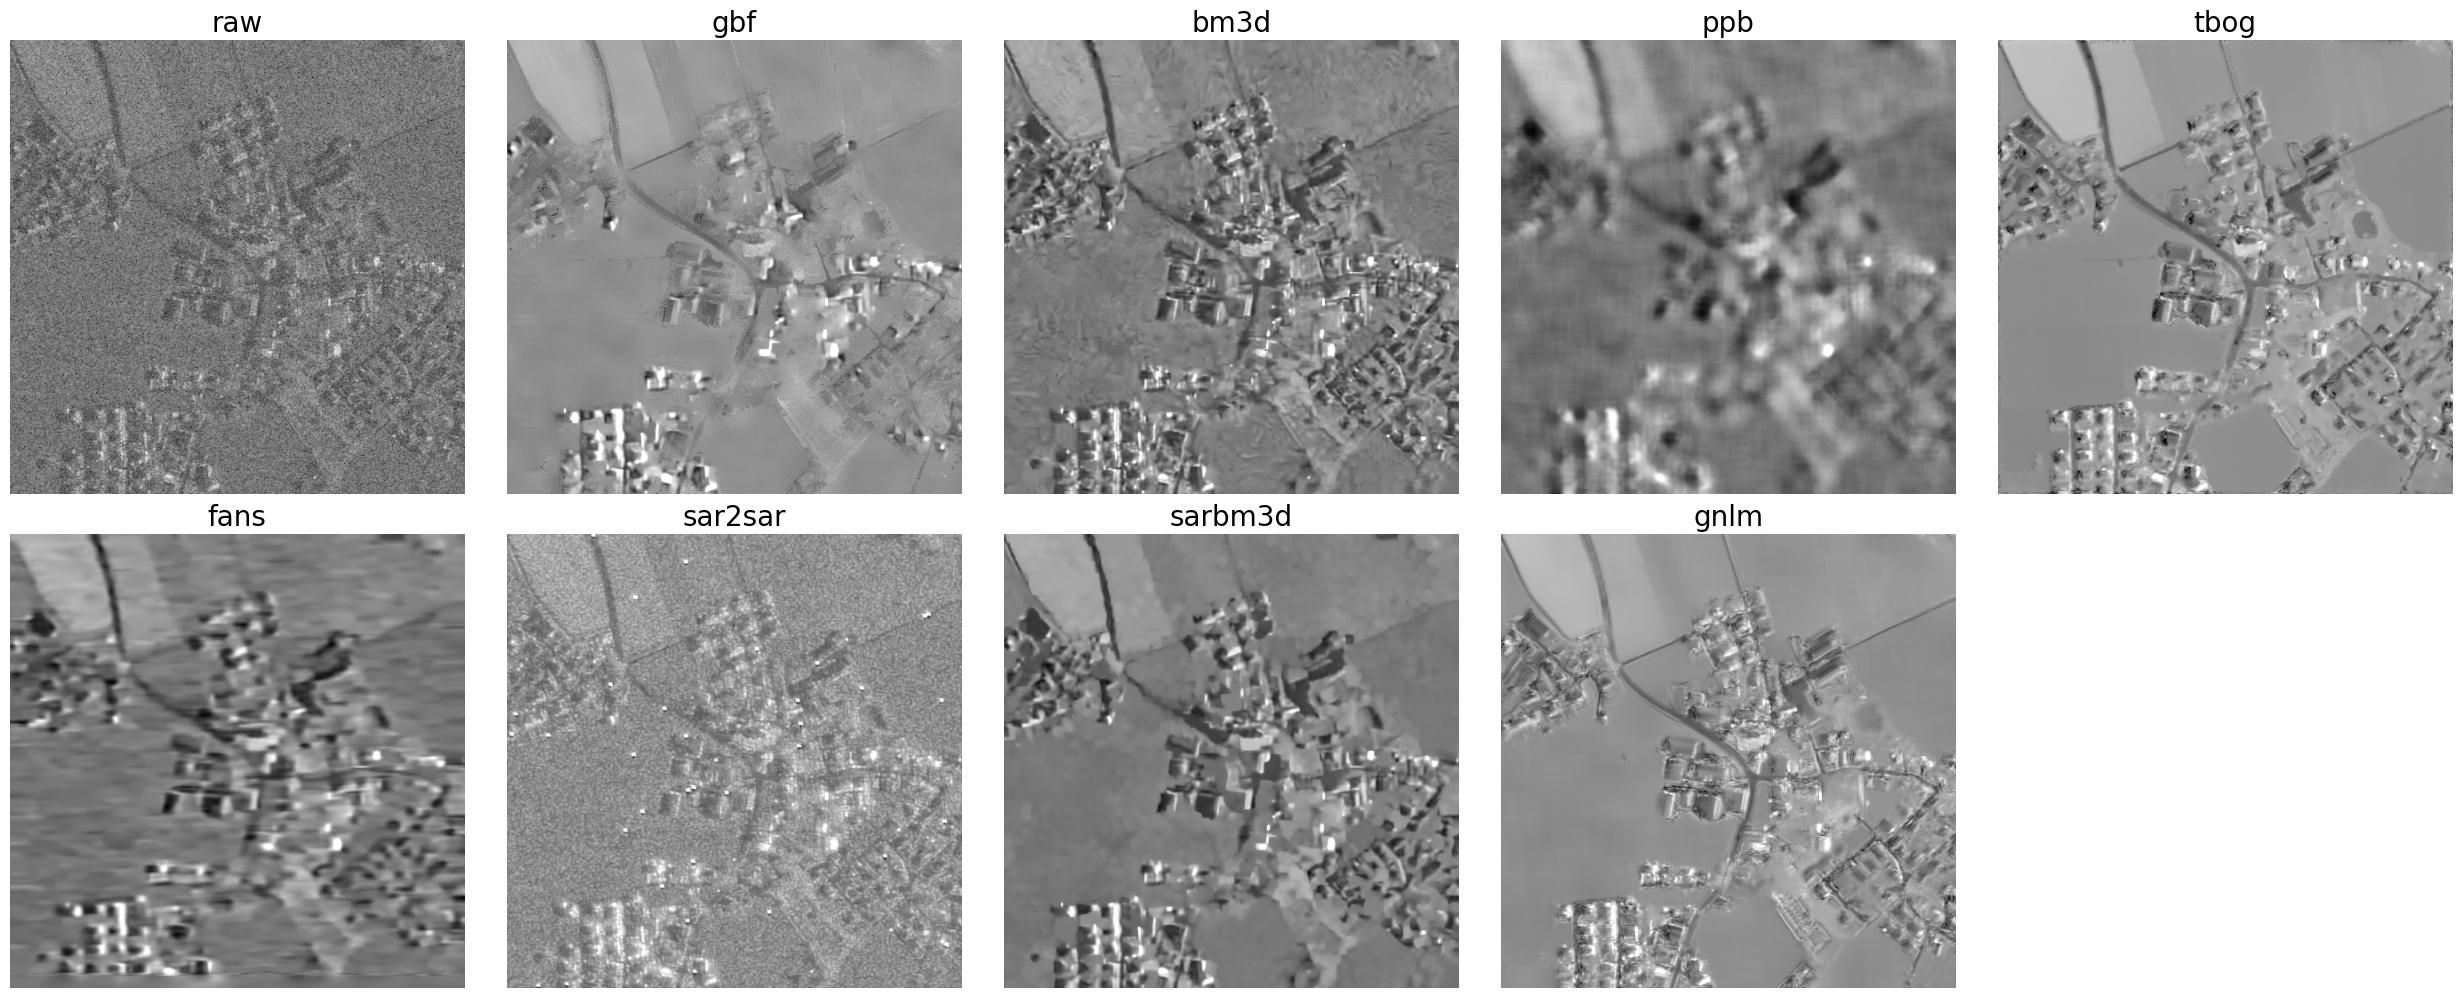

In [44]:
IMAGE_SIZE = 5
N_COLS = 5
FONTSIZE = 20

SELECTED_METHOD_LIST = list(results_dict.keys())
N_IMAGES = len(SELECTED_METHOD_LIST)
N_ROWS = int(np.ceil(N_IMAGES / N_COLS)) + 1

plt.figure(figsize=(IMAGE_SIZE * N_COLS, IMAGE_SIZE * N_ROWS))

plt.subplot(N_ROWS, N_COLS, 1)
plt.imshow(raw_data, cmap='gray')
plt.title('raw', fontsize=FONTSIZE)
plt.axis('off')

for i, m in enumerate(SELECTED_METHOD_LIST):
    filtered_data = results_dict[m]

    plt.subplot(N_ROWS, N_COLS, i + 2)
    plt.imshow(T(filtered_data), cmap='gray')
    plt.title(f'{m}', fontsize=FONTSIZE)
    plt.axis('off')

plt.tight_layout()